<h3>1. Se importan las librerias a Utilizar</h3>

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

<h3>2. Se lee la imagen a evaluar</h3>

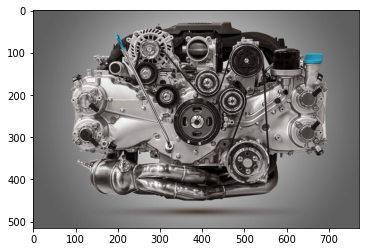

In [2]:
# Imagen original
imagen = cv.imread('Motor.jpg')

plt.imshow(imagen)
plt.show()

<h3>3. Se pasa a color gris y se ofusca la imagen para un mejor tratamiento</h3>

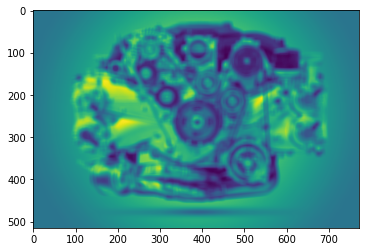

In [3]:
imagenGris = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
imagenOfuscada = cv.blur(imagenGris, (12,12)) 

plt.imshow(imagenOfuscada)
plt.show()

<h3>5. Se aplica la Transformada de Hough</h3>

In [4]:
# PARAMETROS DE LA FUNCION DE HOUG
# Parametro 1: 
#   Imagen a la cual se le va a aplicar
# Parametro 2: 
#   Método de detección a realizar, para nuestro caso --> HOUGH_GRADIENT
# Parametro 3: 
#   Imagen de la imagen de la imagen y la resolución del acumulador
# Parametro 4: 
#   La distancia mínima del centro detectado. 
#   Si este parámetro es pequeño, además de un círculo correcto, se detectaran mas circulos no buscados. 
#   Si este parámetro es grande, se perderán algunos círculos
# Parametro 5: 
#   Para nuestro caso, es el umbral máximo en la detección de bordes por Canny
# Parametro 6: 
#   Para nuestro caso, es el umbral mínimo en la detección de bordes por Canny
# Parametro 7:
#   Es el radio mínimo del círculo
# Parametro 8:
#   Es el radio máximo del círculo
detected_circles = cv.HoughCircles(imagenOfuscada, cv.HOUGH_GRADIENT, 1, 30, param1 = 100, param2 = 30, minRadius = 10, maxRadius = 100)

<h3>6. Se recorren los circulos encontrados y se busca el que posea el Radio indicado</h3>

Centro (382, 264), radio = 52


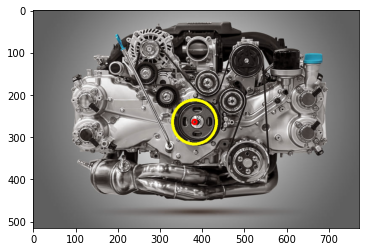

In [5]:
# Si se detectaron circulos
if detected_circles is not None: 

    # Convertir los parámetros del círculo a, b, y r en enteros de 16 bits
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    # Se recorren los circulos detectados
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 

        # Se dibuja solo el circulo que cumpla con el Radio Indicado
        if r == 52: # < -- RADIO CONOCIDO
            # Dibujar el circulo
            cv.circle(imagen, (a, b), r, (255, 255, 0), 5) 
        
            # Mostramos por consola los datos del circulo
            print("Centro ({:}, {:}), radio = {:}".format(a, b, r))

            # Dibujar un círculo pequeño alrededor del centro
            cv.circle(imagen, (a, b), 5, (255, 0, 0), 3)

    # Mostramos la imagen con el circulo detectado
    plt.imshow(imagen)
    plt.show()